# EPL Dashboard - Exploratory Data Analysis (M1)

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("../data/raw/epl_final.csv")
df.shape

(9380, 22)

In [6]:
df.columns

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='str')

In [7]:
df.dtypes

Season                 str
MatchDate              str
HomeTeam               str
AwayTeam               str
FullTimeHomeGoals    int64
FullTimeAwayGoals    int64
FullTimeResult         str
HalfTimeHomeGoals    int64
HalfTimeAwayGoals    int64
HalfTimeResult         str
HomeShots            int64
AwayShots            int64
HomeShotsOnTarget    int64
AwayShotsOnTarget    int64
HomeCorners          int64
AwayCorners          int64
HomeFouls            int64
AwayFouls            int64
HomeYellowCards      int64
AwayYellowCards      int64
HomeRedCards         int64
AwayRedCards         int64
dtype: object

In [8]:
df["MatchDate"] = pd.to_datetime(df["MatchDate"])
df.dtypes

Season                          str
MatchDate            datetime64[us]
HomeTeam                        str
AwayTeam                        str
FullTimeHomeGoals             int64
FullTimeAwayGoals             int64
FullTimeResult                  str
HalfTimeHomeGoals             int64
HalfTimeAwayGoals             int64
HalfTimeResult                  str
HomeShots                     int64
AwayShots                     int64
HomeShotsOnTarget             int64
AwayShotsOnTarget             int64
HomeCorners                   int64
AwayCorners                   int64
HomeFouls                     int64
AwayFouls                     int64
HomeYellowCards               int64
AwayYellowCards               int64
HomeRedCards                  int64
AwayRedCards                  int64
dtype: object

In [9]:
df["Season"].unique()[:5]

<StringArray>
['2000/01', '2001/02', '2002/03', '2003/04', '2004/05']
Length: 5, dtype: str

In [10]:
df = df.sort_values(["Season", "MatchDate"])
df["MatchRank"] = df.groupby("Season").cumcount() + 1
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,MatchRank
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,4,6,6,13,12,1,2,0,0,1
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,5,7,7,19,14,1,2,0,0,2
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,9,8,4,15,21,5,3,1,0,3
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,6,5,8,11,13,1,1,0,0,4
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,6,6,4,21,20,1,3,0,0,5


In [11]:
season_counts = df.groupby("Season").size()
season_counts.head()

Season
2000/01    380
2001/02    380
2002/03    380
2003/04    335
2004/05    335
dtype: int64

In [12]:
df["TotalMatches"] = df.groupby("Season")["MatchRank"].transform("max")
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,MatchRank,TotalMatches
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,6,6,13,12,1,2,0,0,1,380
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,7,7,19,14,1,2,0,0,2,380
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,8,4,15,21,5,3,1,0,3,380
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,5,8,11,13,1,1,0,0,4,380
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,6,4,21,20,1,3,0,0,5,380


In [13]:
df["SeasonProgress"] = df["MatchRank"] / df["TotalMatches"]
def classify_period(p):
    if p <= 1/3:
        return "Early"
    elif p <= 2/3:
        return "Mid"
    else:
        return "Late"
df["SeasonPeriod"] = df["SeasonProgress"].apply(classify_period)
df[["Season", "MatchRank", "TotalMatches", "SeasonProgress", "SeasonPeriod"]].head()

,Season,MatchRank,TotalMatches,SeasonProgress,SeasonPeriod
0,2000/01,1,380,0.002632,Early
1,2000/01,2,380,0.005263,Early
2,2000/01,3,380,0.007895,Early
3,2000/01,4,380,0.010526,Early
4,2000/01,5,380,0.013158,Early


In [14]:
df["FullTimeResult"].value_counts()

FullTimeResult
H    4299
A    2768
D    2313
Name: count, dtype: int64

In [15]:
df["IsWin"] = df["FullTimeResult"].apply(lambda x: 1 if x in ["H", "A"] else 0)
df["IsWin"].value_counts()

IsWin
1    7067
0    2313
Name: count, dtype: int64

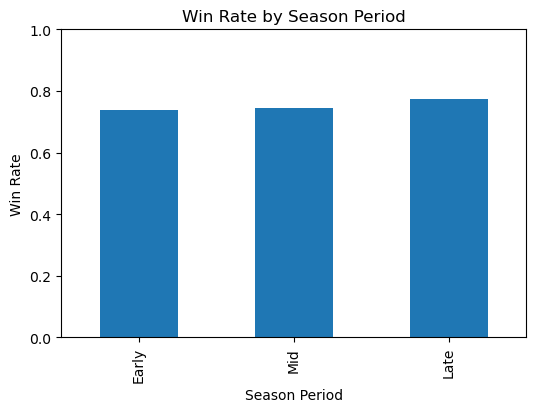

In [17]:
import matplotlib.pyplot as plt
win_rate = df.groupby("SeasonPeriod")["IsWin"].mean()
plt.figure(figsize=(6,4))
win_rate.loc[["Early","Mid","Late"]].plot(kind="bar")

plt.title("Win Rate by Season Period")
plt.ylabel("Win Rate")
plt.xlabel("Season Period")
plt.ylim(0,1)
plt.show()


In [18]:
df["TotalGoals"] = df["FullTimeHomeGoals"] + df["FullTimeAwayGoals"]
df[["FullTimeHomeGoals", "FullTimeAwayGoals", "TotalGoals"]].head()

,FullTimeHomeGoals,FullTimeAwayGoals,TotalGoals
0,4,0,4
1,4,2,6
2,1,3,4
3,2,2,4
4,2,0,2


In [19]:
avg_goals = df.groupby("SeasonPeriod")["TotalGoals"].mean()
avg_goals

SeasonPeriod
Early    2.700322
Late     2.749601
Mid      2.703987
Name: TotalGoals, dtype: float64

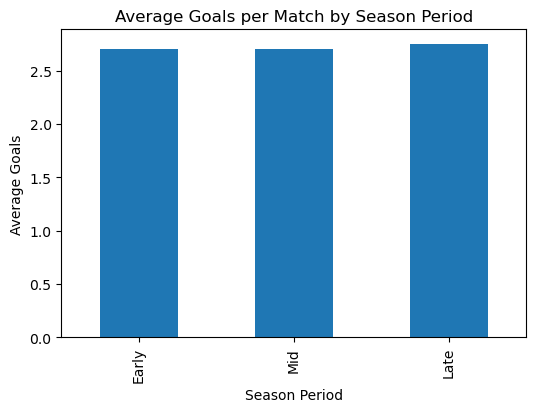

In [20]:
plt.figure(figsize=(6,4))
avg_goals.loc[["Early","Mid","Late"]].plot(kind="bar")

plt.title("Average Goals per Match by Season Period")
plt.ylabel("Average Goals")
plt.xlabel("Season Period")
plt.show()

In [21]:
df["TotalShots"] = df["HomeShots"] + df["AwayShots"]
df[["TotalGoals", "TotalShots"]].head()

,TotalGoals,TotalShots
0,4,25
1,6,29
2,4,22
3,4,19
4,2,29


In [22]:
conversion = (
    df.groupby("SeasonPeriod")
      .agg({"TotalGoals": "sum", "TotalShots": "sum"})
)

conversion["ConversionRate"] = conversion["TotalGoals"] / conversion["TotalShots"]
conversion

,TotalGoals,TotalShots,ConversionRate
SeasonPeriod,,,
Early,8398,76505,0.109771
Late,8620,76786,0.112260
Mid,8477,75845,0.111767


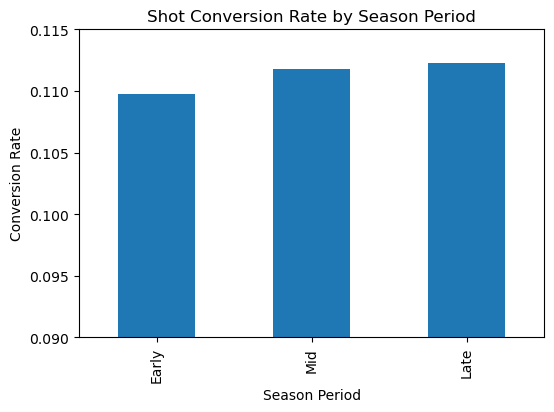

In [23]:
plt.figure(figsize=(6,4))

conversion.loc[["Early","Mid","Late"], "ConversionRate"].plot(kind="bar")

plt.title("Shot Conversion Rate by Season Period")
plt.ylabel("Conversion Rate")
plt.xlabel("Season Period")
plt.ylim(0.09, 0.115)
plt.show()

The shot conversion rate analysis shows that league-wide offensive efficiency is slightly lower in the early season compared to mid and late season periods. Although the differences are small, conversion efficiency increases marginally as the season progresses. This suggests that teams may become more effective at finishing opportunities later in the season, potentially due to tactical adjustments or improved team cohesion.